## Participants
* Samantha
* Rachelle
* Andrew

## Résumé des observations

Ce jeu de données comprend 3 colonnes et 1 439 968 lignes



# <div style='color:white;background: #005792;text-align: center;padding: 15px 0'>Recommandations - Visualisation de la source de données Rating basics</div>

### Installation des librairies

In [4]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly-express
# !pip install plotly

### Importation des librairies

In [5]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

import re

### Chargement des fichiers

In [7]:
source_dir= '/home/dstrec/dstrec/00_data_source/imdb_datasets'
name_file= 'title.ratings.tsv'
file_path= f"{source_dir}/{name_file}"

df= pd.read_csv(file_path, sep='\t', na_values='\\N', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439968 entries, 0 to 1439967
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1439968 non-null  object 
 1   averageRating  1439968 non-null  float64
 2   numVotes       1439968 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.0+ MB


### Visualisation de la part de non renseigné de chaque variable du fichier

In [8]:
#Visualisation de la part de non renseigné de chaque variable du fichier
########################################################################""
for i in df.columns.values:
    print("DataVisualisation de la variable ",i)
    print("Cette variable a ",len(df[i].unique())," valeurs distintes")    
    if df[i].isna().sum()>0:
       res= df[i].isnull().value_counts(normalize = "true")
       plt.figure(figsize = (4, 4))
       plt.pie(res, labels = ['Part des renseignés', 'Part des non renseignés'], autopct='%1.1f%%')
       plt.title("Visualisation de la part des valeurs null de la variable ")
       plt.show()
    else:
        print("Cette variable ne contient pas de données non renseignées","\n")

DataVisualisation de la variable  tconst
Cette variable a  1439968  valeurs distintes
Cette variable ne contient pas de données non renseignées 

DataVisualisation de la variable  averageRating
Cette variable a  91  valeurs distintes
Cette variable ne contient pas de données non renseignées 

DataVisualisation de la variable  numVotes
Cette variable a  22346  valeurs distintes
Cette variable ne contient pas de données non renseignées 



### Autres visualisations

Text(0.5, 0, 'BoxPlot des notes moyennes')

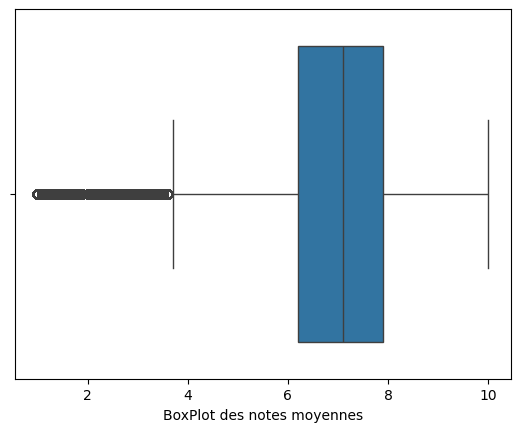

In [9]:
#BoxPlot des notes moyennes
#######################################

sns.boxplot(x =df['averageRating'])
plt.xlabel('BoxPlot des notes moyennes')

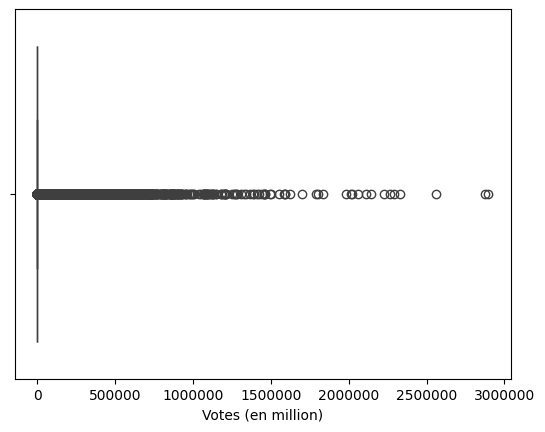

In [10]:
#BoxPlot des Nb de votes
##########################

sns.boxplot(x =df['numVotes'])
plt.xlabel('BoxPlot de la repartition des votes')
plt.xlabel('Votes (en million)')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

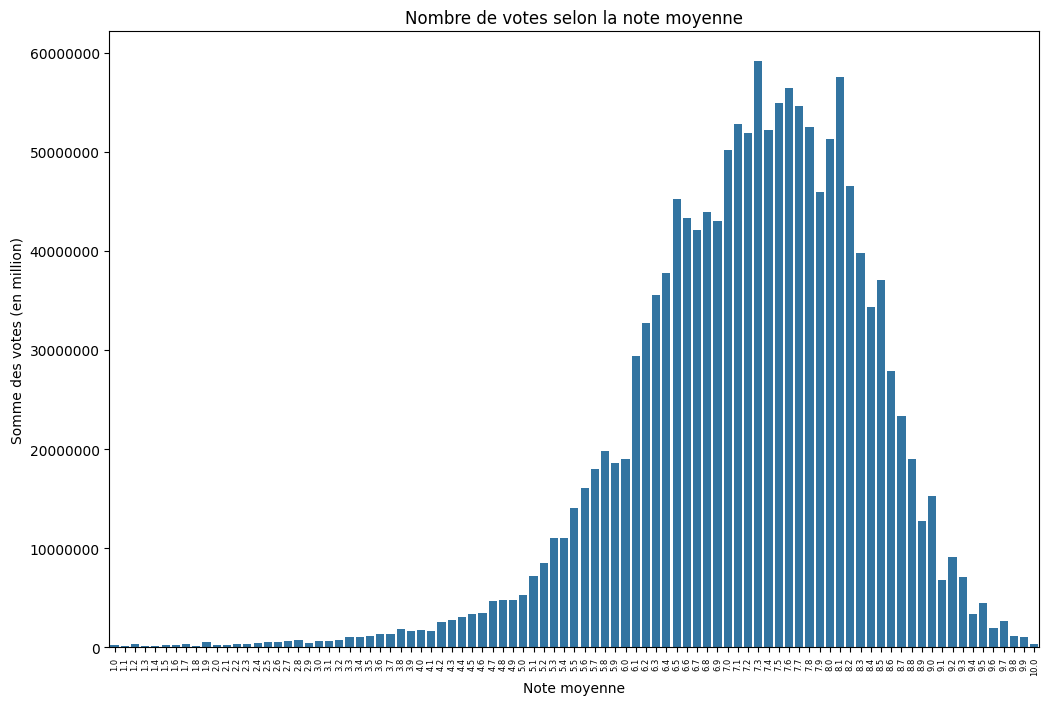

In [11]:
VotesParNoteMoy = df.groupby(['averageRating'],
                    as_index=False).agg({'numVotes': ['sum']})

VotesParNoteMoy.columns = [
'_'.join(col).rstrip('_') for col in VotesParNoteMoy.columns.values
]
fig = plt.figure(figsize=(12, 8)) 
ax = sns.barplot(y=VotesParNoteMoy.numVotes_sum,
                 x=VotesParNoteMoy.averageRating)
ax.tick_params(axis='x', rotation=90)
plt.title("Nombre de votes selon la note moyenne")
plt.xlabel('Note moyenne')
plt.ylabel('Somme des votes (en million)')
ax.set_xticklabels(labels=VotesParNoteMoy['averageRating'],rotation=90,fontsize=6) 
plt.ticklabel_format(style='plain', axis='y')
plt.show()